# Ch02.03. 막대그래프

---
* 날짜: 2022.04.18
* 이름: 윤태우

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### **| 기본사용**

```
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()
```

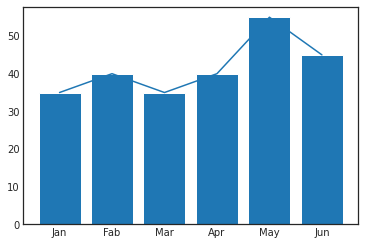

In [5]:
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.plot(xs, nums)  # 플롯은 x값이 없어도 y값이 나올수 있음.
plt.bar(xs, nums)   # 바는 x값이 반드시 있어야함.
plt.show()

#### **| 옵션**

```
plt.bar(xs, nums, 
        color = '색깔'
        edgecolor='테두리색'
        width/ height=바의 너비/높이
        linewidth=테두리두께
        align=눈금위치('center'/'edge'), 
        tick_label=[])
```

<BarContainer object of 6 artists>

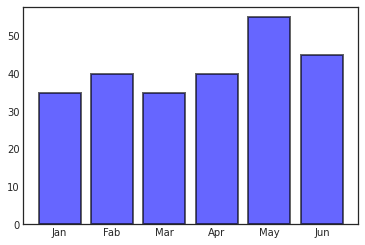

In [18]:
plt.bar(xs, nums, 
        color = 'blue',
        edgecolor= 'k',
        linewidth= 2,
        alpha = 0.6)

#### **| 수평 막대그래프**


```
plt.barh(xs, nums)
```

<BarContainer object of 6 artists>

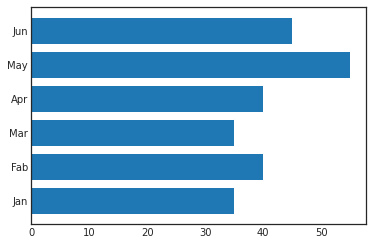

In [19]:
plt.barh(xs, nums)

### (2) Seaborn 으로 그리기




#### **| 기본사용**

```
sns.barplot(x=xs, y=nums)
```

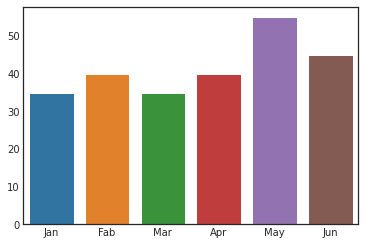

In [20]:
sns.barplot(x=xs, y=nums)

#### **| 옵션**

```
seaborn.barplot(x=None, y=None, 
                color=None, 
                palette=None, # 컬러맵
                saturation=0.75, # 밝기
                )
```

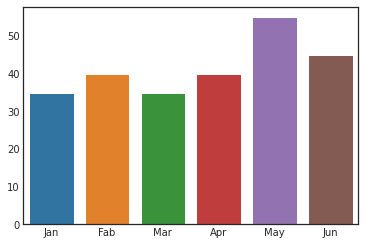

In [26]:
sns.barplot(x=xs, y=nums)

#### **| 수평 막대그래프**


```
sns.barplot(x=nums, y=xs)
```

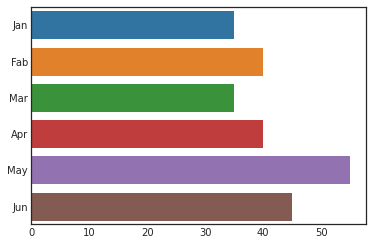

In [27]:
sns.barplot(x=nums, y=xs)

#### **| DataFrame 사용**



* 데이터 프레임을 만들어 줍니다.



In [30]:
df = pd.DataFrame([xs,nums]).T
df.columns=['Month', 'Count']
df

,Month,Count
0,Jan,35
1,Fab,40
2,Mar,35
3,Apr,40
4,May,55
5,Jun,45


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.bar(x=x,y=y)
```




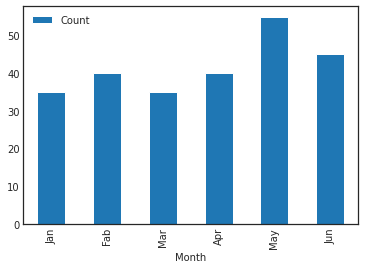

In [33]:
df.plot.bar(x='Month',y='Count')  # x 값에 x = '컬럼명', y값에 y='컬럼명'

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.barplot(data=df,x=x, y=y)
```


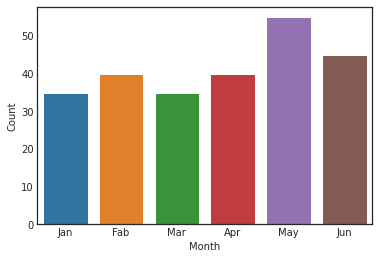

In [35]:
sns.barplot(data=df, x = 'Month', y = 'Count')


## **실습**


---




### (1) 과일 데이터 시각화


```
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)
```

In [37]:
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)
fresh,qual,price,sale

(array([7, 4, 8]),
 array([5, 7, 3]),
 array([1214, 1330, 1458]),
 array([ 787, 1072,  799]))

### (2) **kwargs 이용한 옵션적용




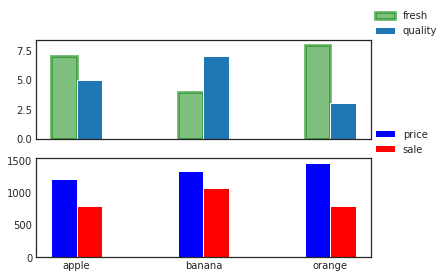

In [160]:
idx = np.arange(3) # 0,1,2
width = 0.2

plt.subplot(2,1,1)
plt.bar(idx,fresh, label = 'fresh', width = width, 
        alpha = 0.5, linewidth = 3, edgecolor = 'g', color = 'g')
plt.bar(idx+width,qual, label = 'quality', width=width)
plt.xticks(idx+width/2, fruits) # ()눈금의 위치, 위치에 적을 값
plt.tick_params('x', labelbottom = False)
plt.legend(loc = (1,1))

plt.subplot(2,1,2)
plt.bar(idx, price, label = 'price', width = width, color = 'blue')
plt.bar(idx+width, sale, label = 'sale', width = width, color = 'red')
plt.xticks(idx+width/2, fruits)
plt.legend(loc = (1,1))
plt.show()

In [104]:
plt.figure(figsize=(4,2))

style = dict(width = width, alpha = 0.5, linewidth = 3, edgecolor = 'k')

<Figure size 288x144 with 0 Axes>

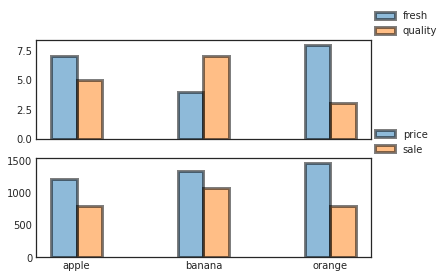

In [105]:
idx = np.arange(3) # 0,1,2
width = 0.2

plt.subplot(2,1,1)
plt.bar(idx,fresh, label = 'fresh', **style)
plt.bar(idx+width,qual, label = 'quality', **style)
plt.xticks(idx+width/2, fruits) # ()눈금의 위치, 위치에 적을 값
plt.tick_params('x', labelbottom = False)
plt.legend(loc = (1,1))

plt.subplot(2,1,2)
plt.bar(idx, price, label = 'price', **style)
plt.bar(idx+width, sale, label = 'sale', **style)
plt.xticks(idx+width/2, fruits)
plt.legend(loc = (1,1))
plt.show()


## 과제


### (1) 막대그래프를 이용한 flight 데이터 시각화

```
df=sns.load_dataset('flights')
```

 `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러온 후 아래와 같은 플롯을 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0203-01.png?raw=true)





In [116]:
df = sns.load_dataset('flights')

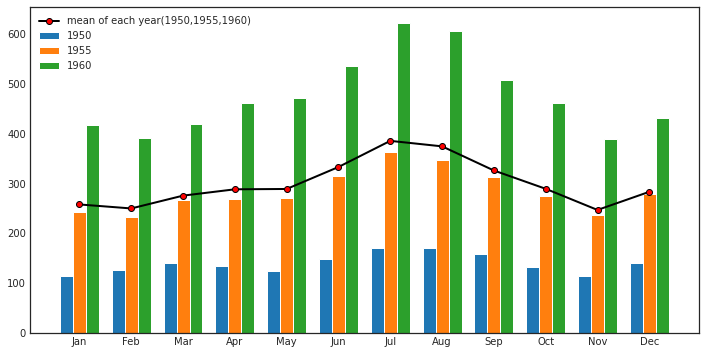

In [226]:
plt.figure(figsize = (12,6))

mask1 = df['year'] == 1950
df1950 = df[mask1]

mask2 = df['year'] == 1955
df1955 = df[mask2]

mask3 = df['year'] == 1960
df1960 = df[mask3]

mask4 = df['year'].isin([1950, 1955, 1960])
df_mean = df[mask4].groupby('month')
df_mean = df_mean.mean()

idx = np.arange(0,47,4)

plt.bar(idx, df1950['passengers'], width = 1, label = '1950')
plt.bar(idx+1, df1955['passengers'], width = 1, label = '1955')
plt.bar(idx+2, df1960['passengers'], width = 1, label = '1960')
plt.plot(idx+1, df_mean['passengers'],marker = 'o', markerfacecolor = 'r', linewidth = 2, color = 'black', markersize = 6, label = 'mean of each year(1950,1955,1960)')
plt.legend(loc = 'upper left')
plt.xticks(idx+1, df1950['month'])
plt.tick_params(axis = 'x', width = 10)